# Frozen Lake
In this notebook I will expirement with reinforcement learning and q-learning on Frozen Lake. I used the following tutorial/explanation to make this notebook: https://towardsdatascience.com/q-learning-for-beginners-2837b777741. The code for this notebook (and some other tutorial/test notebooks) can be found in the following git repository: https://git.fhict.nl/I388371/rlexercise

In [122]:
import gymnasium as gym
import random
import numpy as np
import matplotlib.pyplot as plt

First we will try the frozen lake with is_slippery set to false. I will set up the environment and render the first frame.

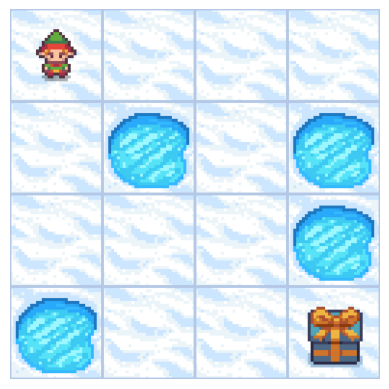

In [123]:
# setup environment
env = gym.make("FrozenLake-v1", is_slippery=False, render_mode="rgb_array")
env.reset()
lake = env.render()

# show first frame of game
plt.imshow(lake)
plt.axis('off')
plt.show()

To get a bit more familiar with the frozen lake and q-learning in general I tried a few things manually and explored the frozen lake, with the help of the tutorial.

First I created an empty q-table with the states and actions as zero values, because there is no idea of what the values would be. 

In [124]:
nb_states = env.observation_space.n
nb_actions = env.action_space.n
qtable = np.zeros((nb_states, nb_actions))

print('Q-table:')
print(qtable)

Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


These are all the possible actions that the agent can take, it can go left, right, up or down. These are stored as integers and there is a built in function to randomly select one of the four available actions.

In [125]:
# LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3
# randomly choose an action
env.action_space.sample()

0

Next I will manually move the elf on the lake to see what the agent will do when playing the game and updating its state.

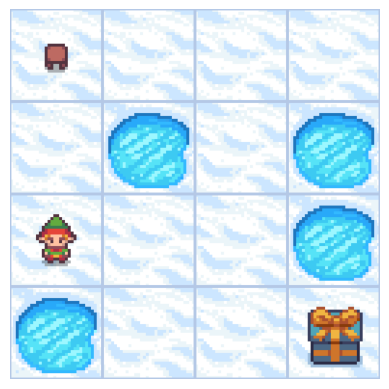

In [126]:
env.reset()
# go down
env.step(1)

# randomly select next step
step = env.action_space.sample()
env.step(step)

lake = env.render()

plt.imshow(lake)
plt.axis('off')
plt.show()

Next I will randomly chose the next step and print each frame until the goal is reached or the elf fell down a hole. This is mainly done to visualise the frozen lake so I get a better understanding of the game.

Observation: 9
Reward: 0.0
Done: False
Truncated: False
Info: {'prob': 1.0}
--------------------


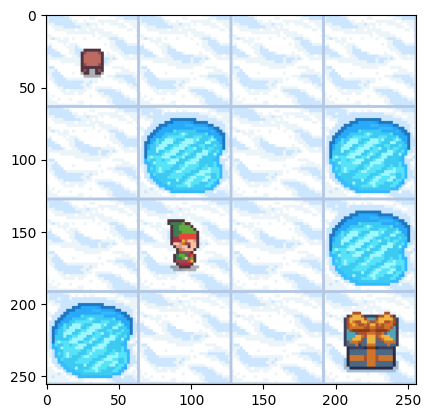

Observation: 8
Reward: 0.0
Done: False
Truncated: False
Info: {'prob': 1.0}
--------------------


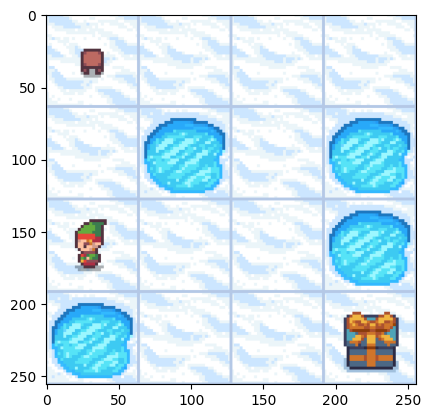

Observation: 9
Reward: 0.0
Done: False
Truncated: False
Info: {'prob': 1.0}
--------------------


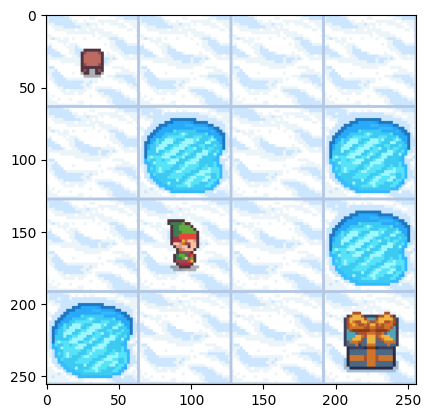

Observation: 8
Reward: 0.0
Done: False
Truncated: False
Info: {'prob': 1.0}
--------------------


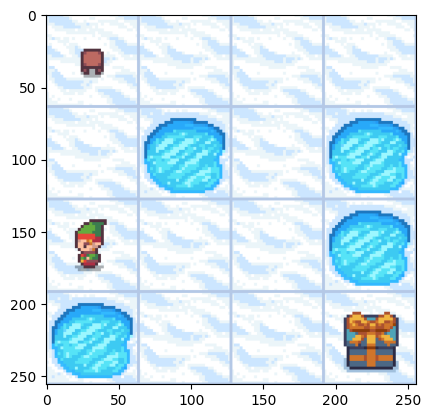

Observation: 12
Reward: 0.0
Done: True
Truncated: False
Info: {'prob': 1.0}
--------------------


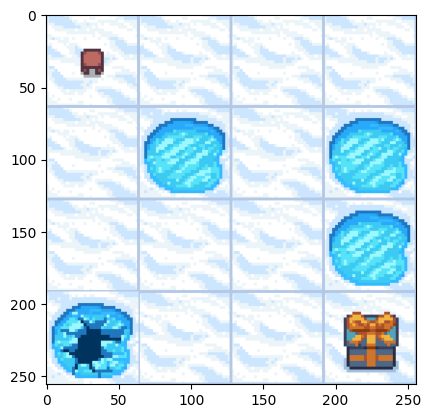

In [127]:
done = False

while not done:
    action = env.action_space.sample()
    obs, reward, done, truncated, info = env.step(action)

    print("Observation:", obs)
    print("Reward:", reward)
    print("Done:", done)
    print("Truncated:", truncated)
    print("Info:", info)
    print("-" * 20)

    new_frame = env.render()
    plt.imshow(new_frame)
    plt.pause(0.5)

    if done or truncated:
        env.reset()
        break

### Q-learning

The Q-table holds the values that are reflected by the actions of each state. These values backpropagate from the goal to the initial state, this will guide the agent to select the actions that lead to success.

* a = alpha or learning rate
* y = gamma or discount factor


* Learning rate (between 0 and 1): This is how much the orignal Q(St, At) should change. If a = 0 the value never changes but if a = 1 the value changes extremely fast. This would be too fast. There needs to be a balance between the importance of past and new knowledge.
* y is the discount factor between 0 and 1. This determines how much the againt cares about future rewards compared to immediate ones. If y = 0 the again only focuses on immediate rewards, but if y = 1 any potential future reward has the same value as current ones. For frozen lake there is only 1 possible reward, so the discount factor should be high.

when training the code a random action should be chosen when all values in the current state are just zeros, otherwise the action with the highest state should be chosen. This action should be implemented by moving in the desired direction. 

the value of the original state should be updated with the new state.

Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

--------------------
Q-table after training:
[[0.      0.      0.59049 0.     ]
 [0.      0.      0.6561  0.     ]
 [0.      0.729   0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.81    0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.9     0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      1.      0.     ]
 [0.      0.      0.      0.     ]]
Non-zero values: 6


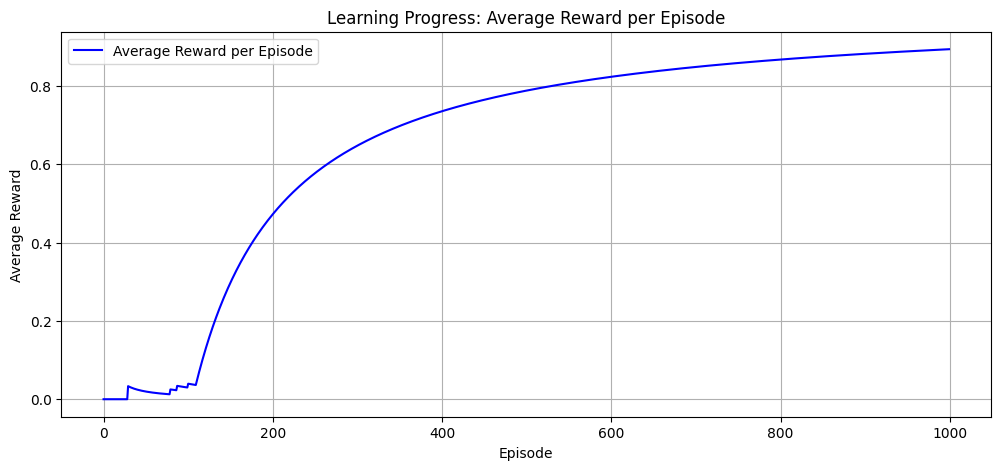

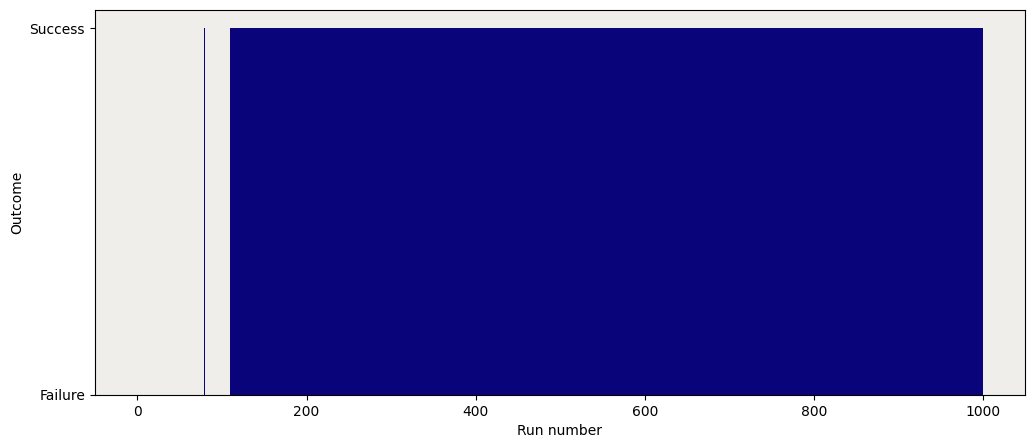

In [128]:
# initiate q-table with zero values
qtable = np.zeros((env.observation_space.n, env.action_space.n))

episodes = 1000
learning_rate = 0.5
discount_factor = 0.9 # a high gamma is chosen because there is only a reward when the agent reaches the goal

outcomes = []
all_rewards = []

print('Q-table before training:')
print(qtable)

for _ in range(episodes):
    state, _ = env.reset()
    done = False
    total_reward = 0

    outcomes.append("Failure")

    while not done:
        if np.max(qtable[state]) > 0:
            action = np.argmax(qtable[state])

        else:
            action = env.action_space.sample()

        new_state, reward, done, truncated, info = env.step(action)

        qtable[state, action] = qtable[state, action] + learning_rate * (reward + discount_factor * np.max(qtable[new_state]) - qtable[state, action])
        
        state = new_state
        total_reward += reward

        if reward:
            outcomes[-1] = "Success"
    
    all_rewards.append(total_reward)

avg_rewards = np.cumsum(all_rewards) / (np.arange(episodes) + 1)

non_zero_count = np.count_nonzero(qtable)

print()
print('-' * 20)
print('Q-table after training:')
print(qtable)
print(f'Non-zero values: {non_zero_count}')

plt.figure(figsize=(12, 5))
plt.plot(avg_rewards, label="Average Reward per Episode", color="blue")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.title("Learning Progress: Average Reward per Episode")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()

The blue bar shows a win, so this shows that in the beginning it really struggles with finding the goal, but close before 80 runs it consitently wins. In the first plot we can see the average reward go up near the end, when the agent starts winning.

In [129]:
episodes = 100
nb_success = 0

for _ in range(100):
    state, _ = env.reset()
    done = False
    
    while not done:
        if np.max(qtable[state]) > 0:
          action = np.argmax(qtable[state])
        else:
          action = env.action_space.sample()
             
        new_state, reward, done, truncated, info = env.step(action)

        state = new_state

        nb_success += reward

print (f"Success rate = {nb_success/episodes*100}%")

Success rate = 100.0%


In [130]:
state, _ = env.reset()
done = False
sequence = []

while not done:
    if np.max(qtable[state]) > 0:
      action = np.argmax(qtable[state])
    else:
      action = env.action_space.sample()
    
    sequence.append(action)

    new_state, reward, done, truncated, info = env.step(action)

    state = new_state

print(f"Sequence = {sequence}")

Sequence = [2, 2, 1, 1, 1, 2]


This is one of the six correct sequences.

## Epsilon greedy algorithm
In the previous version the agent always picked the highest value, when there is a non-zero value. The other actions are never chosen, so their value is never updated. The agent should be encouraged to try a new value, to see if it can improve. There should be a balance between exploitation (always picking the highest value) and exploration (chose random actions to try to find better ones). The method for picking exploration in the beginning and exploitation later is the epsilon-greedy algorithm. Every time the agent has to take an action it has a probability of e of choosing a random one and a probability of 1-e of choosing the one with the highest value. I will try the linear decay first.

Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

--------------------
Q-table after training:
[[0.531441   0.59049    0.4782969  0.531441  ]
 [0.531441   0.         0.46427259 0.4782969 ]
 [0.47823279 0.63735843 0.35692941 0.3287777 ]
 [0.45751087 0.         0.25397221 0.25397221]
 [0.59049    0.6561     0.         0.531441  ]
 [0.         0.         0.         0.        ]
 [0.         0.80129761 0.         0.369774  ]
 [0.         0.         0.         0.        ]
 [0.6561     0.         0.729      0.59049   ]
 [0.6561     0.81       0.81       0.        ]
 [0.72895049 0.9        0.         0.6489031 ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.81       0.9        0.729     ]
 [0.81       0.9        1.    

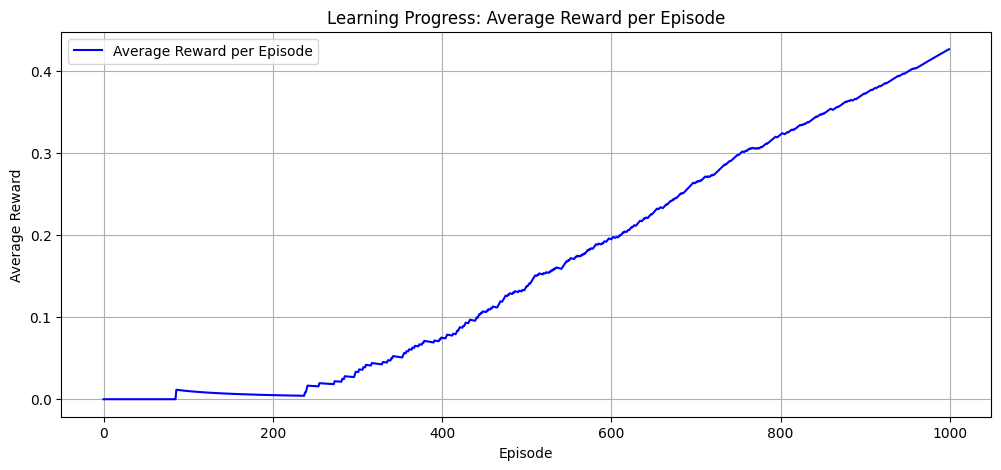

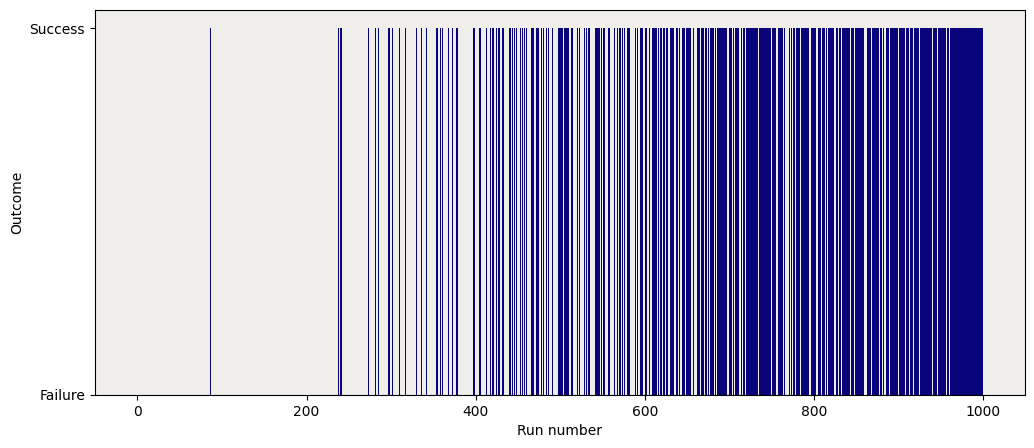

In [131]:
qtable = np.zeros((env.observation_space.n, env.action_space.n))

episodes = 1000 
learning_rate = 0.5
discount_factor = 0.9
epsilon = 1.0 
epsilon_decay = 0.001  

outcomes = []
all_rewards = []

print('Q-table before training:')
print(qtable)

for _ in range(episodes):
    state, _ = env.reset()
    done = False
    total_reward = 0

    outcomes.append("Failure")
    
    while not done:
        rnd = np.random.random()

        if rnd < epsilon:
          action = env.action_space.sample()
        else:
          action = np.argmax(qtable[state])
             
        new_state, reward, done, truncated, info = env.step(action)

        qtable[state, action] = qtable[state, action] + learning_rate * (reward + discount_factor * np.max(qtable[new_state]) - qtable[state, action])
        
        state = new_state
        total_reward += reward

        if reward:
          outcomes[-1] = "Success"

    epsilon = max(epsilon - epsilon_decay, 0)
  
    all_rewards.append(total_reward)

avg_rewards = np.cumsum(all_rewards) / (np.arange(episodes) + 1)
non_zero_count = np.count_nonzero(qtable)

print()
print('-' * 20)
print('Q-table after training:')
print(qtable)
print(f'Non-zero values: {non_zero_count}')

plt.figure(figsize=(12, 5))
plt.plot(avg_rewards, label="Average Reward per Episode", color="blue")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.title("Learning Progress: Average Reward per Episode")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()

It has taken more time to conistently win the game, but there are a lot more non-zero values in the q table compared to before the non-greedy algorithm was used.

In [132]:
episodes = 100
nb_success = 0

for _ in range(100):
    state, _ = env.reset()
    done = False
    
    while not done:
        action = np.argmax(qtable[state])

        new_state, reward, done, truncated, info = env.step(action)

        state = new_state
        nb_success += reward

print (f"Success rate = {nb_success/episodes*100}%")

Success rate = 100.0%


The success rate is still at 100%. 

### Different learning rate and discount factor
Next I will try two different hyperparameters to train the agent, one where the learning rate is higher and one where the discount factor is lower, to see if this makes a difference.

### Higher learning rate

Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

--------------------
Q-table after training:
[[0.531441   0.59049    0.59049    0.531441  ]
 [0.531441   0.         0.6561     0.59048973]
 [0.59048992 0.729      0.58423701 0.65609845]
 [0.65555153 0.         0.38293864 0.32565411]
 [0.59049    0.6561     0.         0.531441  ]
 [0.         0.         0.         0.        ]
 [0.         0.81       0.         0.6561    ]
 [0.         0.         0.         0.        ]
 [0.6561     0.         0.729      0.59049   ]
 [0.6561     0.81       0.81       0.        ]
 [0.729      0.9        0.         0.729     ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.81       0.9        0.729     ]
 [0.81       0.9        1.    

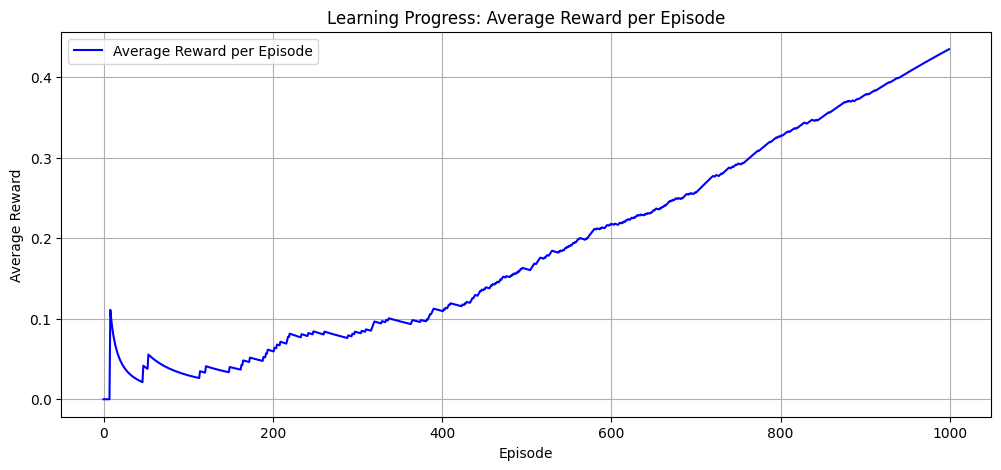

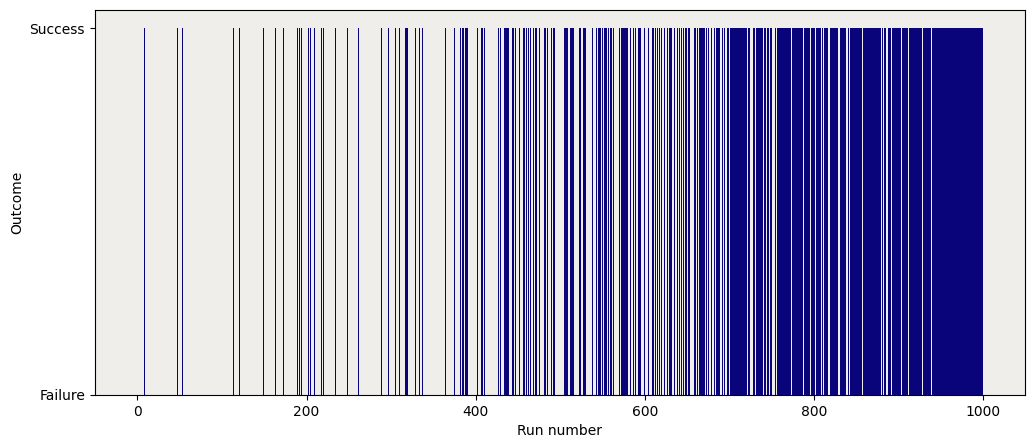

In [133]:
qtable = np.zeros((env.observation_space.n, env.action_space.n))

episodes = 1000 
learning_rate = 0.7
discount_factor = 0.9
epsilon = 1.0 
epsilon_decay = 0.001  

outcomes = []
all_rewards = []

print('Q-table before training:')
print(qtable)

for _ in range(episodes):
    state, _ = env.reset()
    done = False
    total_reward = 0

    outcomes.append("Failure")
    
    while not done:
        rnd = np.random.random()

        if rnd < epsilon:
          action = env.action_space.sample()
        else:
          action = np.argmax(qtable[state])
             
        new_state, reward, done, truncated, info = env.step(action)

        qtable[state, action] = qtable[state, action] + learning_rate * (reward + discount_factor * np.max(qtable[new_state]) - qtable[state, action])
        
        state = new_state
        total_reward += reward

        if reward:
          outcomes[-1] = "Success"

    epsilon = max(epsilon - epsilon_decay, 0)
  
    all_rewards.append(total_reward)

avg_rewards = np.cumsum(all_rewards) / (np.arange(episodes) + 1)
non_zero_count = np.count_nonzero(qtable)

print()
print('-' * 20)
print('Q-table after training:')
print(qtable)
print(f'Non-zero values: {non_zero_count}')

plt.figure(figsize=(12, 5))
plt.plot(avg_rewards, label="Average Reward per Episode", color="blue")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.title("Learning Progress: Average Reward per Episode")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()

### Lower discount factor

Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

--------------------
Q-table after training:
[[0.046656   0.07776    0.07776    0.046656  ]
 [0.046656   0.         0.1296     0.07775291]
 [0.07775986 0.216      0.07767057 0.12958636]
 [0.1295791  0.         0.076568   0.06196904]
 [0.07776    0.1296     0.         0.046656  ]
 [0.         0.         0.         0.        ]
 [0.         0.36       0.         0.12898697]
 [0.         0.         0.         0.        ]
 [0.1296     0.         0.216      0.07776   ]
 [0.1296     0.36       0.36       0.        ]
 [0.216      0.6        0.         0.21599982]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.36       0.6        0.216     ]
 [0.36       0.6        1.    

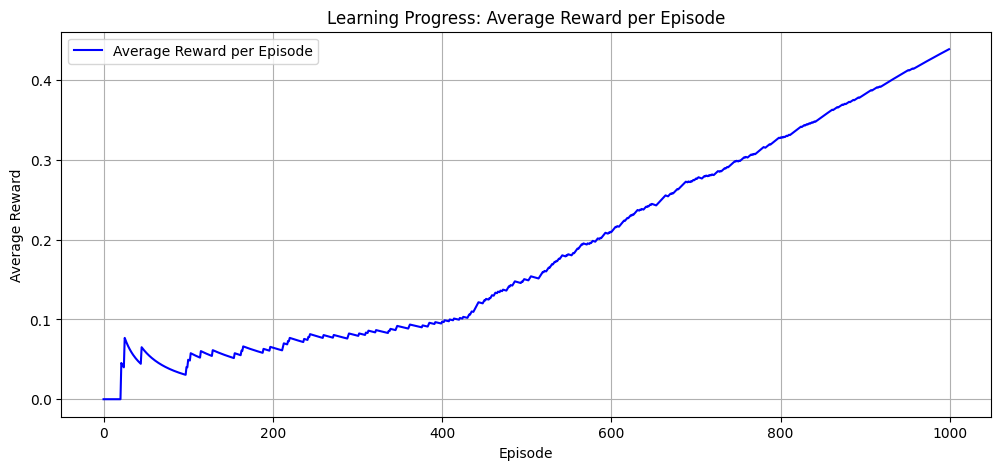

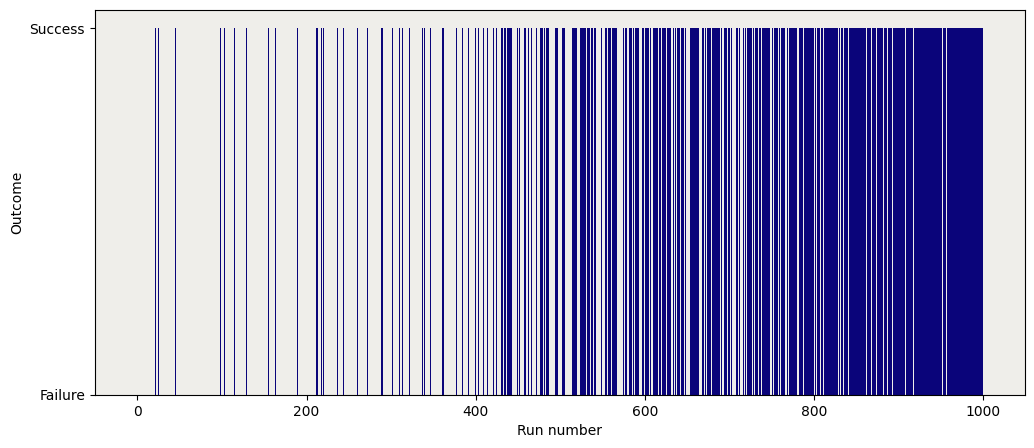

In [134]:
qtable = np.zeros((env.observation_space.n, env.action_space.n))

episodes = 1000 
learning_rate = 0.5
discount_factor = 0.6
epsilon = 1.0 
epsilon_decay = 0.001  

outcomes = []
all_rewards = []

print('Q-table before training:')
print(qtable)

for _ in range(episodes):
    state, _ = env.reset()
    done = False
    total_reward = 0

    outcomes.append("Failure")
    
    while not done:
        rnd = np.random.random()

        if rnd < epsilon:
          action = env.action_space.sample()
        else:
          action = np.argmax(qtable[state])
             
        new_state, reward, done, truncated, info = env.step(action)

        qtable[state, action] = qtable[state, action] + learning_rate * (reward + discount_factor * np.max(qtable[new_state]) - qtable[state, action])
        
        state = new_state
        total_reward += reward

        if reward:
          outcomes[-1] = "Success"

    epsilon = max(epsilon - epsilon_decay, 0)
  
    all_rewards.append(total_reward)

avg_rewards = np.cumsum(all_rewards) / (np.arange(episodes) + 1)
non_zero_count = np.count_nonzero(qtable)

print()
print('-' * 20)
print('Q-table after training:')
print(qtable)
print(f'Non-zero values: {non_zero_count}')

plt.figure(figsize=(12, 5))
plt.plot(avg_rewards, label="Average Reward per Episode", color="blue")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.title("Learning Progress: Average Reward per Episode")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()

I dont see any significant changes in the amount of episodes it takes the agent to consistently win the game with the different learning rate and discount factor.

## Slippery
This time I will try again, but with is_slippery set to true. When it is true the againt has a 33% chance of succeeding. This feature adds a lot of randomness to the training. 

Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

--------------------
Q-table after training:
[[0.0217931  0.0210342  0.03412625 0.02138992]
 [0.01129837 0.01114074 0.0110887  0.04175721]
 [0.12316817 0.01172833 0.01217087 0.01239732]
 [0.00651334 0.01086884 0.01136317 0.01137647]
 [0.07153078 0.01549849 0.0129618  0.01836456]
 [0.         0.         0.         0.        ]
 [0.22724635 0.00192526 0.00642796 0.00788277]
 [0.         0.         0.         0.        ]
 [0.01435769 0.03327954 0.02855131 0.10918115]
 [0.04032971 0.28603023 0.04799619 0.06780409]
 [0.62354834 0.06988004 0.07744222 0.08022009]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.14177827 0.21090201 0.20455202 0.1741171 ]
 [0.33274986 0.35412223 0.3440

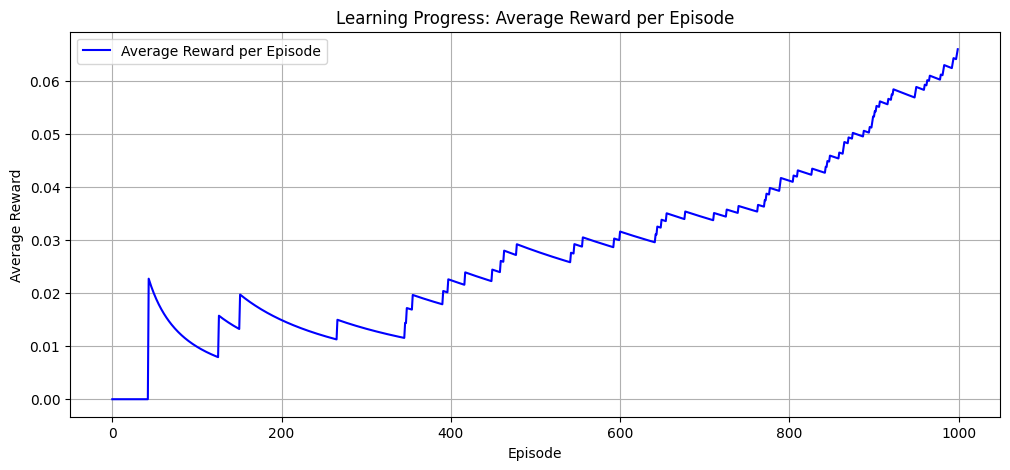

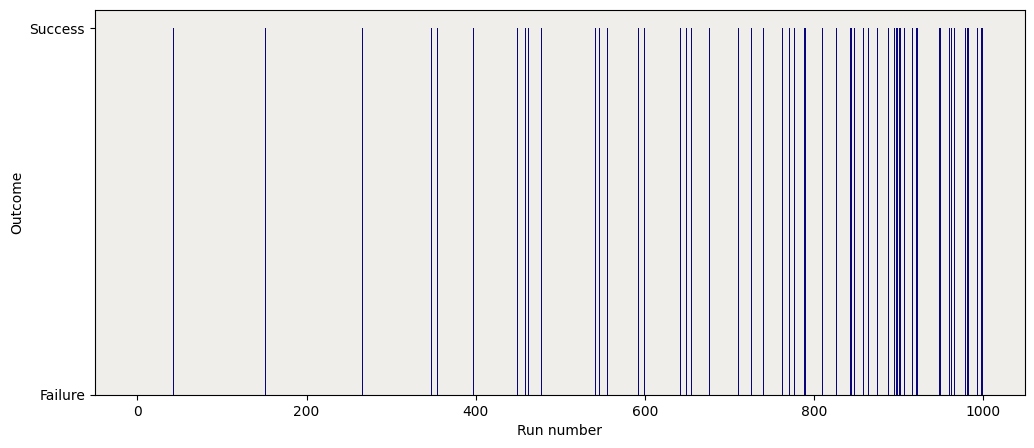

Success rate = 19.0%


In [135]:
env = gym.make("FrozenLake-v1", is_slippery=True, render_mode="rgb_array")
env.reset()

qtable = np.zeros((env.observation_space.n, env.action_space.n))

episodes = 1000 
learning_rate = 0.5 
discount_factor = 0.9
epsilon = 1.0 
epsilon_decay = 0.001

outcomes = []
all_rewards = []

print('Q-table before training:')
print(qtable)

for _ in range(episodes):
    state, _ = env.reset()
    done = False
    total_reward = 0

    outcomes.append("Failure")
    
    while not done:
      rnd = np.random.random()
      if rnd < epsilon:
        action = env.action_space.sample()
      else:
        action = np.argmax(qtable[state])
             
      new_state, reward, done, truncated, info = env.step(action)

      qtable[state, action] = qtable[state, action] + learning_rate * (reward + discount_factor * np.max(qtable[new_state]) - qtable[state, action])
        
      state = new_state
      total_reward += reward

      if reward:
        outcomes[-1] = "Success"
    
    all_rewards.append(total_reward)
      

    epsilon = max(epsilon - epsilon_decay, 0)

avg_rewards = np.cumsum(all_rewards) / (np.arange(episodes) + 1)

non_zero_count = np.count_nonzero(qtable)

print()
print('-' * 20)
print('Q-table after training:')
print(qtable)
print(f'Non-zero values: {non_zero_count}')

plt.figure(figsize=(12, 5))
plt.plot(avg_rewards, label="Average Reward per Episode", color="blue")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.title("Learning Progress: Average Reward per Episode")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()

episodes = 100
nb_success = 0

for _ in range(100):
    stat, _ = env.reset()
    done = False
    
    while not done:
      action = np.argmax(qtable[state])

      new_state, reward, done, truncated, info = env.step(action)

      state = new_state

      nb_success += reward

print (f"Success rate = {nb_success/episodes*100}%")

This time the success rate is a lot lower, we can also see it takes a lot longer before the average reward goes up. This shows the agent is struggling to win the game. By looking at the lower graph we can also see it does not consistently start winning the game.

### Exponential decay
next I will try exponential decay for the epsilon-greedy algorithm when slippery lake is set to true, to see if it makes a difference.

Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

--------------------
Q-table after training:
[[0.05184913 0.04800081 0.04276537 0.04217598]
 [0.01238089 0.00654938 0.00668455 0.05002713]
 [0.05400005 0.00771118 0.00796286 0.00802721]
 [0.00615645 0.00561963 0.00370933 0.00735881]
 [0.11794898 0.00821867 0.00525089 0.00534599]
 [0.         0.         0.         0.        ]
 [0.00161787 0.         0.2736174  0.        ]
 [0.         0.         0.         0.        ]
 [0.01127275 0.02407514 0.00165597 0.27384009]
 [0.04107461 0.34505355 0.04112582 0.05658977]
 [0.43418176 0.01297682 0.01567002 0.01403775]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.25300008 0.06513839 0.57396522 0.27480195]
 [0.23232202 0.90498004 0.2264

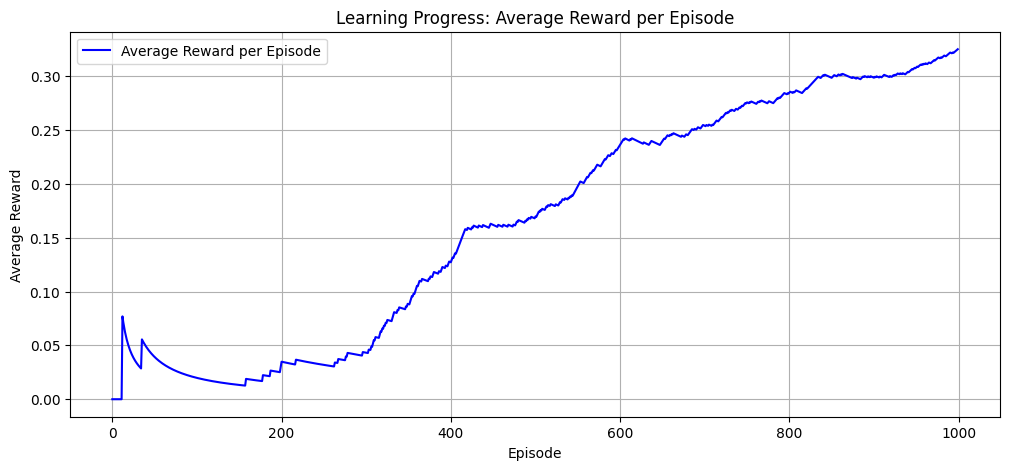

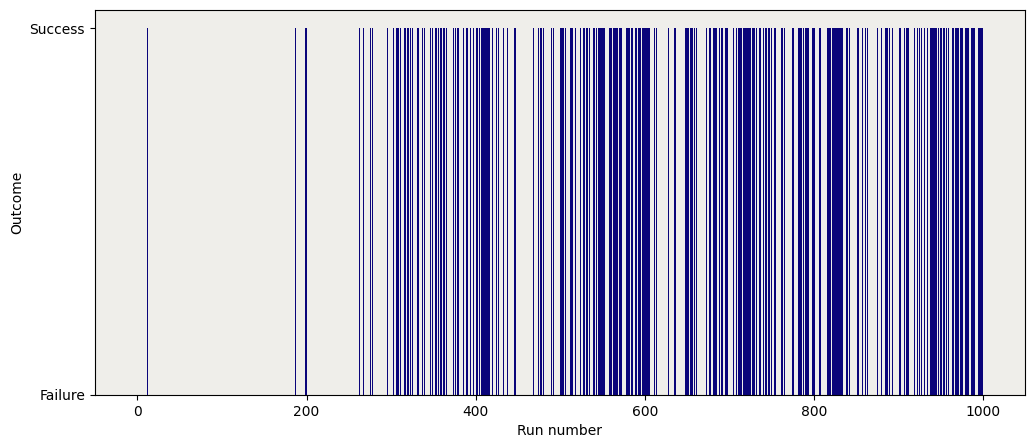

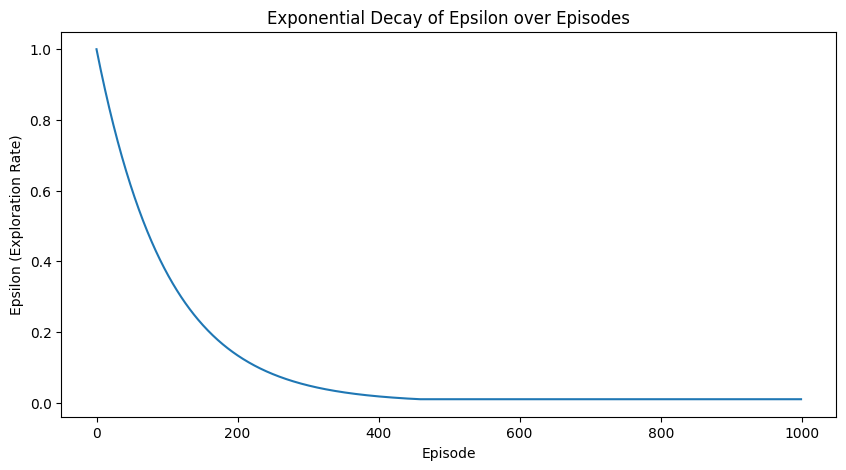

Success rate = 77.0%


In [136]:
env.reset()

qtable = np.zeros((env.observation_space.n, env.action_space.n))

episodes = 1000 
learning_rate = 0.5 
discount_factor = 0.9
initial_epsilon = 1.0 
min_epsilon = 0.01
epsilon_decay = 0.99

outcomes = []
all_rewards = []
epsilon_values = []

print('Q-table before training:')
print(qtable)

for episode in range(episodes):
    state, _ = env.reset()
    done = False
    epsilon = max(min_epsilon, initial_epsilon * (epsilon_decay ** episode))
    epsilon_values.append(epsilon)
    total_reward = 0

    outcomes.append("Failure")
    
    while not done:
      rnd = np.random.random()
      if rnd < epsilon:
        action = env.action_space.sample() # explore
      else:
        action = np.argmax(qtable[state]) # exploit
             
      new_state, reward, done, truncated, info = env.step(action)

      qtable[state, action] = qtable[state, action] + learning_rate * (reward + discount_factor * np.max(qtable[new_state]) - qtable[state, action])
        
      state = new_state
      total_reward += reward

      if reward:
        outcomes[-1] = "Success"
    
    all_rewards.append(total_reward)
      

    epsilon = max(epsilon - epsilon_decay, 0)

avg_rewards = np.cumsum(all_rewards) / (np.arange(episodes) + 1)

non_zero_count = np.count_nonzero(qtable)

print()
print('-' * 20)
print('Q-table after training:')
print(qtable)
print(f'Non-zero values: {non_zero_count}')

plt.figure(figsize=(12, 5))
plt.plot(avg_rewards, label="Average Reward per Episode", color="blue")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.title("Learning Progress: Average Reward per Episode")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(epsilon_values)
plt.xlabel("Episode")
plt.ylabel("Epsilon (Exploration Rate)")
plt.title("Exponential Decay of Epsilon over Episodes")
plt.show()

episodes = 100
nb_success = 0

for _ in range(100):
    stat, _ = env.reset()
    done = False
    
    while not done:
      action = np.argmax(qtable[state])

      new_state, reward, done, truncated, info = env.step(action)

      state = new_state

      nb_success += reward

print (f"Success rate = {nb_success/episodes*100}%")

## Conclusion
The number of the success rate does differ between linear decay and exponential decay, but it changes each time it is ran and I dont see either one of them being consistently higher than the other.

Overall I think there is a lot to improve in this notebook, I have only gone over the basics of Q-learning with the frozen lake. The code itself can also be improved. However, I have spent quite a bit of time working on this notebook and researching Q-learning and I have not had more time to improve this or do more experimenting at this moment.